In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

coffee_kenya = pd.read_csv("coffee_kenya.csv")
total_sales =pd.read_csv("total_sales.csv")

In [2]:
coffee_kenya.head()

,COUNTY,YEAR,PRODUCTION (Kgs),RAINFALL (mm),ALTITUTDE (M),TEMPERATURE (Degree Celsius)
0,KIAMICIRI,2000,"160,589",1200,1386,13 - 26
1,KIANGOTHE,2000,"410,724",1200,1531,13 - 26
2,KIMANDI,2000,"268,752",1400,1672,13 - 24
3,KIRINGA,2000,"575,819",1200,1558,13 - 26
4,KONYU,2000,"476,394",1200,1581,13 - 26


In [3]:
total_sales.rename(columns={"Year": "YEAR"}, inplace=True)

In [4]:


# Load and preprocess the data
coffee_data = pd.merge(coffee_kenya, total_sales, on="YEAR", how="inner")
coffee_data['PRODUCTION (Kgs)'] = coffee_data['PRODUCTION (Kgs)'].str.replace(',', '').astype(float)
coffee_data['Total Export Volume (MT)'] = coffee_data['Total Export Volume (MT)'].str.replace(',', '').astype(float)


In [5]:
coffee_data.head()

,COUNTY,YEAR,PRODUCTION (Kgs),RAINFALL (mm),ALTITUTDE (M),TEMPERATURE (Degree Celsius),Production(MT),Yield (Kg/ha),Area under Coffee (ha),Total Export Volume (MT),Total Export Value(Kshs Billion),Auction Price(us dollars/50 kg,Average Rainfall (mm),Average Temperature (Degree Celsius)
0,KIAMICIRI,2000,160589.0,1200,1386,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
1,KIANGOTHE,2000,410724.0,1200,1531,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
2,KIMANDI,2000,268752.0,1400,1672,13 - 24,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
3,KIRINGA,2000,575819.0,1200,1558,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
4,KONYU,2000,476394.0,1200,1581,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93


In [6]:
coffee_data.dtypes

COUNTY                                   object
YEAR                                      int64
PRODUCTION (Kgs)                        float64
RAINFALL (mm)                             int64
ALTITUTDE (M)                             int64
TEMPERATURE (Degree Celsius)             object
Production(MT)                           object
Yield (Kg/ha)                           float64
Area under Coffee (ha)                   object
Total Export Volume (MT)                float64
Total Export Value(Kshs Billion)        float64
Auction Price(us dollars/50 kg          float64
Average Rainfall (mm)                   float64
Average Temperature (Degree Celsius)    float64
dtype: object

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Summary statistics
coffee_data.describe()



,YEAR,PRODUCTION (Kgs),RAINFALL (mm),ALTITUTDE (M),Yield (Kg/ha),Total Export Volume (MT),Total Export Value(Kshs Billion),Auction Price(us dollars/50 kg,Average Rainfall (mm),Average Temperature (Degree Celsius)
count,570.000000,567.000000,570.000000,570.000000,570.000000,570.000000,570.00000,570.000000,570.000000,570.000000
mean,2002.500000,231983.130511,1277.982456,1572.836842,295.310784,50085.666667,7.16500,91.805000,634.218333,25.130000
std,1.709325,184743.240786,162.262019,135.583850,19.308315,11151.695381,1.40914,26.597731,99.942670,0.175178
min,2000.000000,0.000000,1000.000000,1255.000000,266.147059,37867.000000,5.70000,65.540000,498.410000,24.930000
25%,2001.000000,94474.000000,1200.000000,1457.000000,284.135294,42197.000000,6.00000,68.340000,545.100000,24.970000
50%,2002.500000,192218.000000,1300.000000,1590.000000,295.076471,47664.000000,6.63000,80.445000,644.355000,25.075000
75%,2004.000000,325684.000000,1400.000000,1700.000000,305.294118,52555.000000,8.33000,121.000000,658.380000,25.350000
max,2005.000000,975176.000000,1600.000000,1837.000000,326.135294,72567.000000,9.70000,135.060000,814.710000,25.380000


In [8]:
coffee_data.isnull().sum()

COUNTY                                  0
YEAR                                    0
PRODUCTION (Kgs)                        3
RAINFALL (mm)                           0
ALTITUTDE (M)                           0
TEMPERATURE (Degree Celsius)            4
Production(MT)                          0
Yield (Kg/ha)                           0
Area under Coffee (ha)                  0
Total Export Volume (MT)                0
Total Export Value(Kshs Billion)        0
Auction Price(us dollars/50 kg          0
Average Rainfall (mm)                   0
Average Temperature (Degree Celsius)    0
dtype: int64

In [9]:
#filling the missing values with the mean
coffee_data['PRODUCTION (Kgs)'].fillna(coffee_data['PRODUCTION (Kgs)'].mean(), inplace=True)

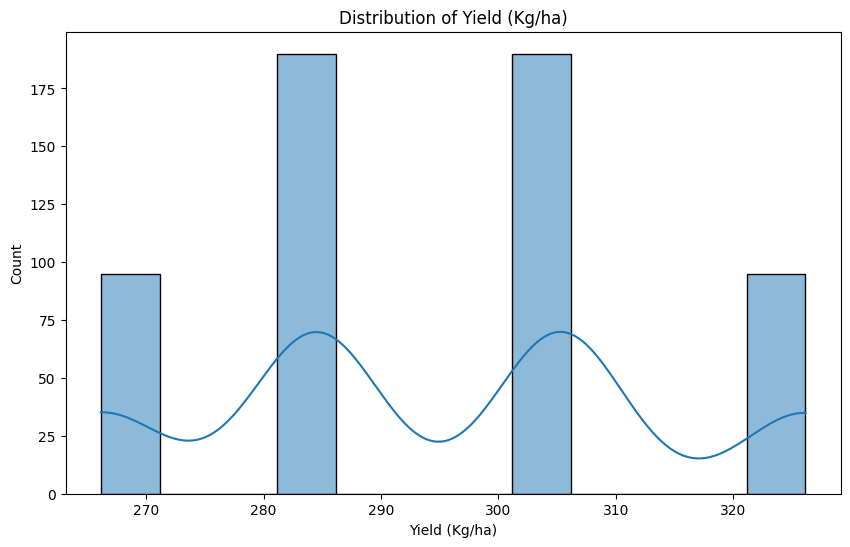

In [10]:
# 2. Distribution of Yield (Kg/ha)
plt.figure(figsize=(10, 6))
sns.histplot(coffee_data["Yield (Kg/ha)"], kde=True)
plt.title("Distribution of Yield (Kg/ha)")
plt.xlabel("Yield (Kg/ha)")
plt.show()

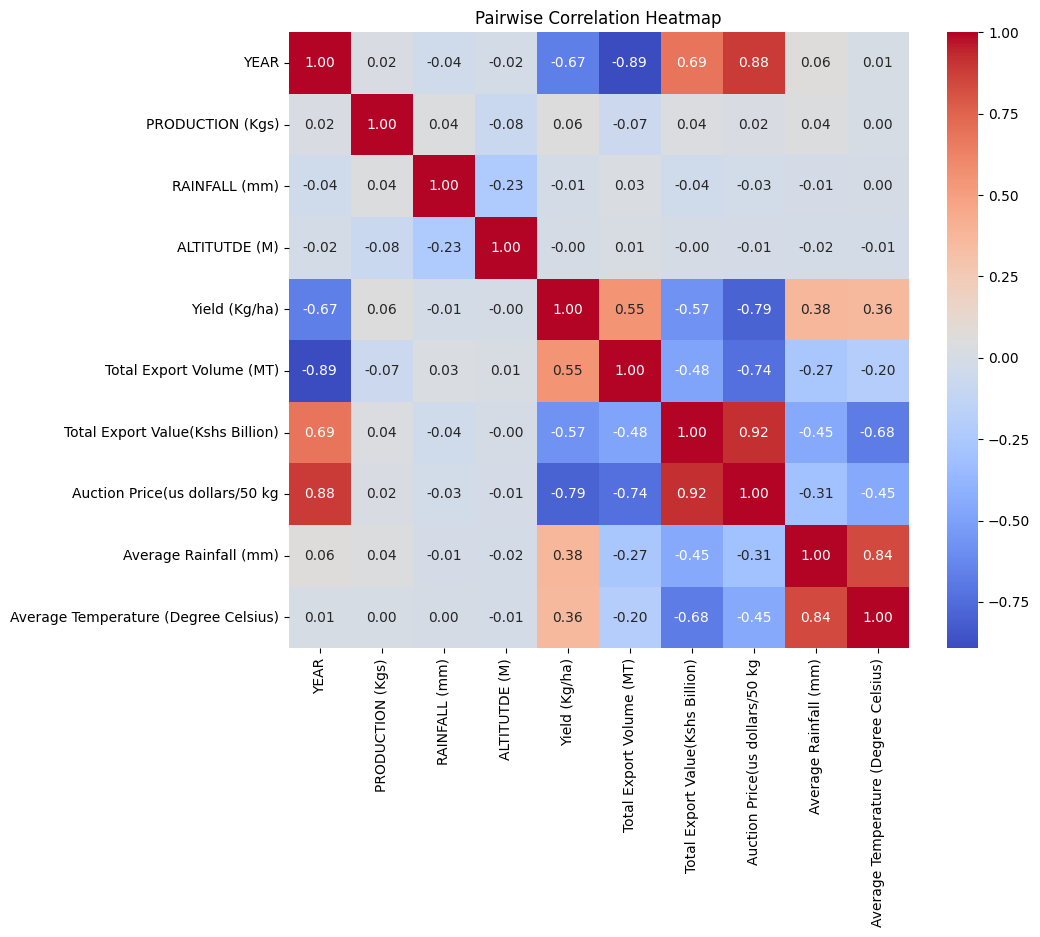

In [11]:
# 3. Pairwise correlation (excluding non-numeric columns)
numeric_columns = coffee_data.select_dtypes(include=[int, float]).columns
correlation_matrix = coffee_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Correlation Heatmap")
plt.show()

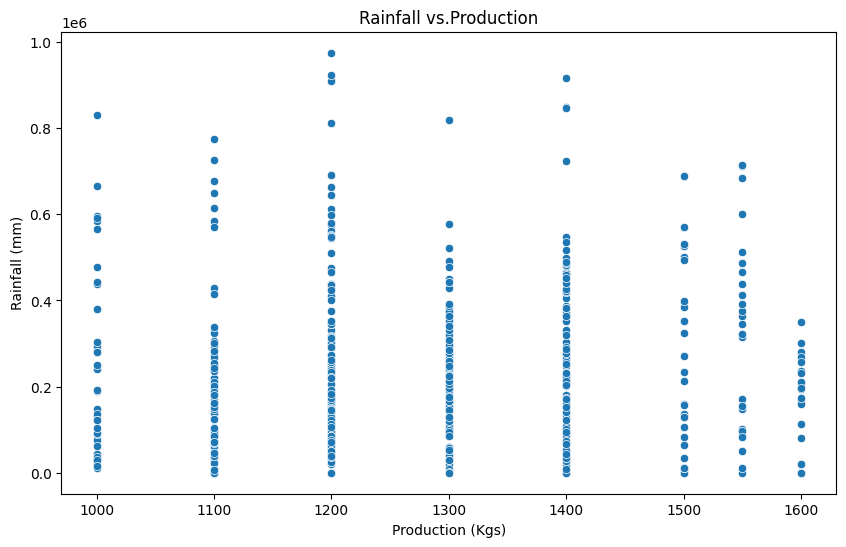

In [12]:
# 4. Relationship between Yield and Rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x="RAINFALL (mm)", y="PRODUCTION (Kgs)", data=coffee_data)
plt.title("Rainfall vs.Production")
plt.xlabel("Production (Kgs)")
plt.ylabel("Rainfall (mm)")
plt.show()

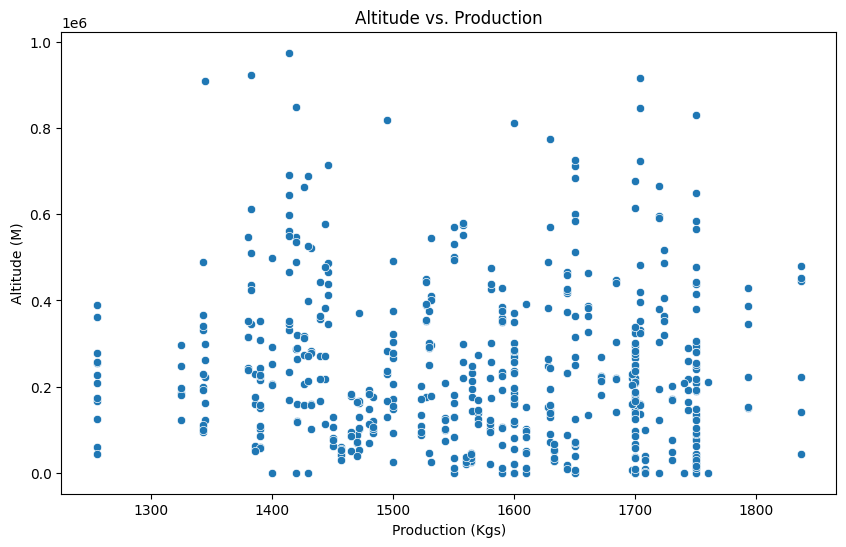

In [13]:
# 5. Relationship between Yield and Altitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x="ALTITUTDE (M)", y="PRODUCTION (Kgs)", data=coffee_data)
plt.title("Altitude vs. Production")
plt.xlabel("Production (Kgs)")
plt.ylabel("Altitude (M)")
plt.show()


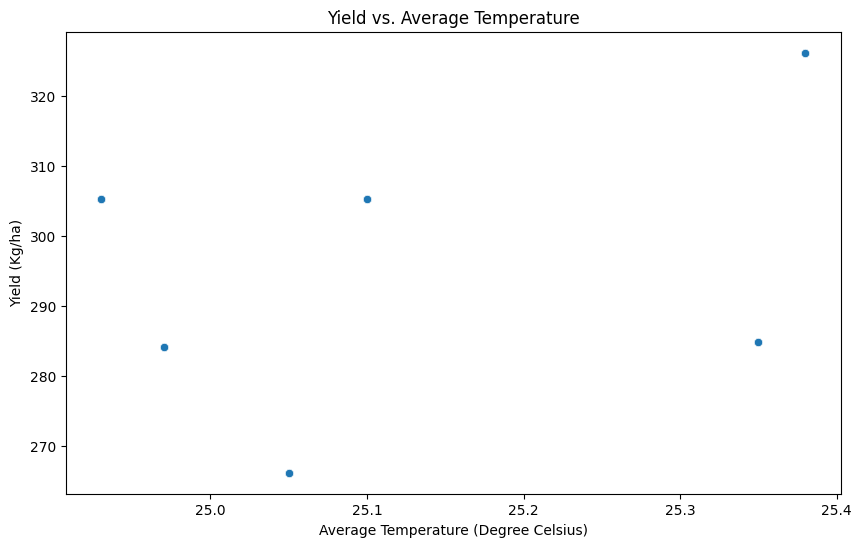

In [14]:
# 6. Relationship between Yield and Average Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Average Temperature (Degree Celsius)", y="Yield (Kg/ha)", data=coffee_data)
plt.title("Yield vs. Average Temperature")
plt.xlabel("Average Temperature (Degree Celsius)")
plt.ylabel("Yield (Kg/ha)")
plt.show()

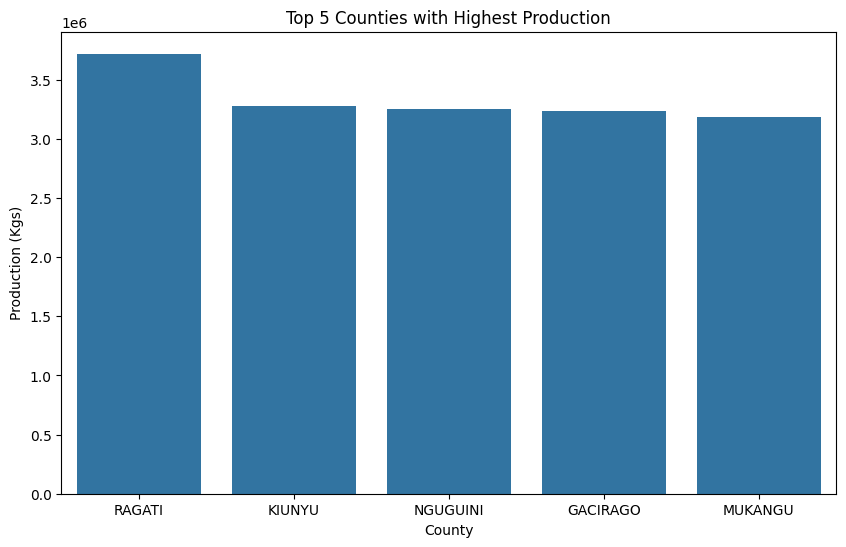

In [15]:
#top - 5 counties with the highest production
top_5_counties = coffee_data.groupby("COUNTY")["PRODUCTION (Kgs)"].sum().sort_values(ascending=False).head(5)

#plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_counties.index, y=top_5_counties.values)
plt.title("Top 5 Counties with Highest Production")
plt.xlabel("County")
plt.ylabel("Production (Kgs)")
plt.show()


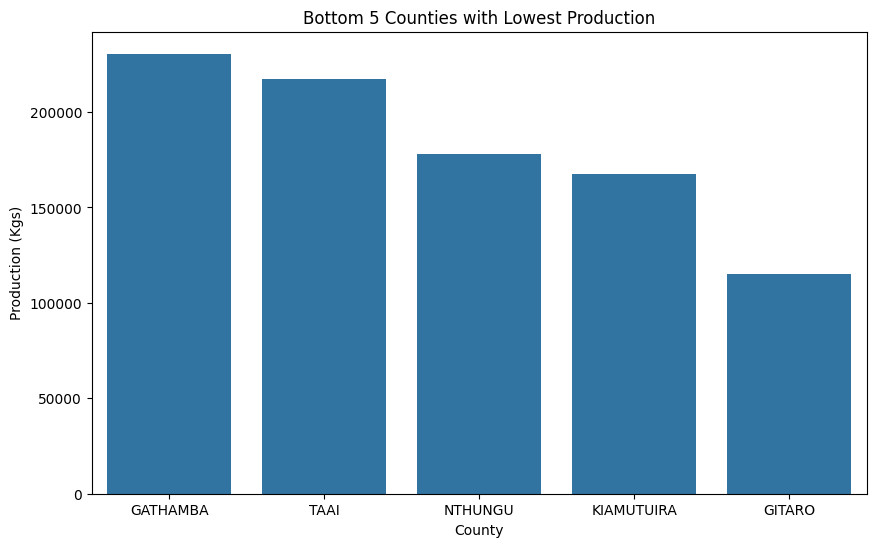

In [16]:
bottom_5_counties = coffee_data.groupby("COUNTY")["PRODUCTION (Kgs)"].sum().sort_values(ascending=False).tail(5)

#plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_counties.index, y=bottom_5_counties.values)
plt.title("Bottom 5 Counties with Lowest Production")
plt.xlabel("County")
plt.ylabel("Production (Kgs)")
plt.show()



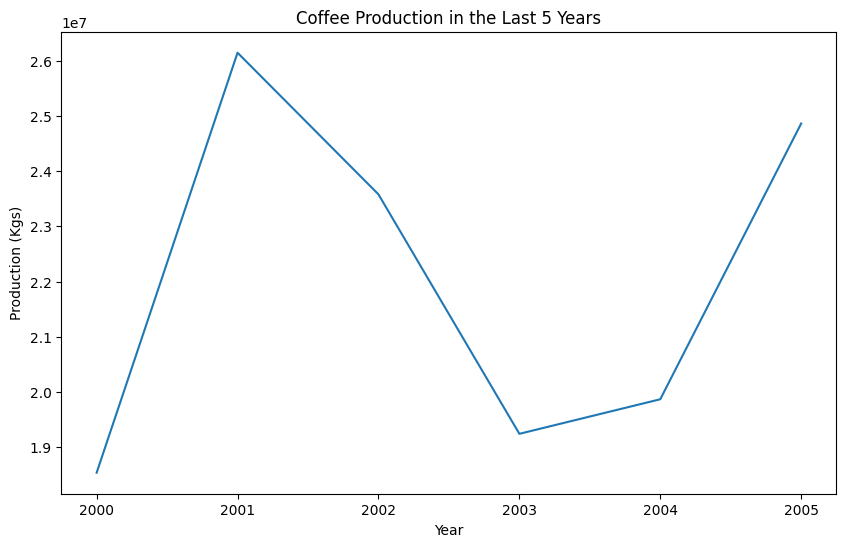

In [17]:
#how was the production in the last 5 years

#grouping the data by year
production_by_year = coffee_data.groupby("YEAR")["PRODUCTION (Kgs)"].sum()

#plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=production_by_year.index, y=production_by_year.values)
plt.title("Coffee Production in the Last 5 Years")
plt.xlabel("Year")
plt.ylabel("Production (Kgs)")

plt.show()



In [27]:
production_by_year

YEAR
2000    1.853140e+07
2001    2.615030e+07
2002    2.358104e+07
2003    1.923720e+07
2004    1.986390e+07
2005    2.486655e+07
Name: PRODUCTION (Kgs), dtype: float64

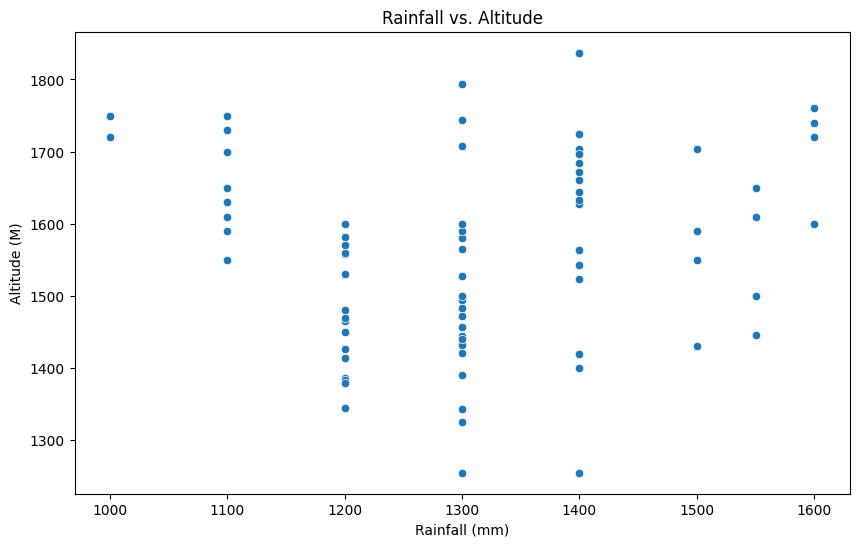

In [18]:
#  relationship between rainfall and altitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x="RAINFALL (mm)", y="ALTITUTDE (M)", data=coffee_data)
plt.title("Rainfall vs. Altitude")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Altitude (M)")
plt.show()



In [23]:
# finding out the counties with the highest production over the years 
#grouping the data by year and county
production_by_year_county = coffee_data.groupby(["YEAR", "COUNTY"])["PRODUCTION (Kgs)"].sum().reset_index().nlargest(5, "YEAR")


In [24]:
production_by_year_county

,YEAR,COUNTY,PRODUCTION (Kgs)
475,2005,CHEMA,441616.0
476,2005,GACHAGORI,151561.0
477,2005,GACHIEGE,278315.0
478,2005,GACHUNGU,181239.0
479,2005,GACIRAGO,566246.0


In [26]:
least_production_by_year_county = coffee_data.groupby(["YEAR", "COUNTY"])["PRODUCTION (Kgs)"].sum().reset_index().nsmallest(5, "YEAR")
least_production_by_year_county

,YEAR,COUNTY,PRODUCTION (Kgs)
0,2000,CHEMA,448122.0
1,2000,GACHAGORI,0.0
2,2000,GACHIEGE,24092.0
3,2000,GACHUNGU,0.0
4,2000,GACIRAGO,831681.0


In [15]:
coffee_data.head()

,COUNTY,YEAR,PRODUCTION (Kgs),RAINFALL (mm),ALTITUTDE (M),TEMPERATURE (Degree Celsius),Production(MT),Yield (Kg/ha),Area under Coffee (ha),Total Export Volume (MT),Total Export Value(Kshs Billion),Auction Price(us dollars/50 kg,Average Rainfall (mm),Average Temperature (Degree Celsius)
0,KIAMICIRI,2000,160589.0,1200,1386,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
1,KIANGOTHE,2000,410724.0,1200,1531,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
2,KIMANDI,2000,268752.0,1400,1672,13 - 24,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
3,KIRINGA,2000,575819.0,1200,1558,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93
4,KONYU,2000,476394.0,1200,1581,13 - 26,"51,900",305.294118,"170,000",72567.0,6.76,68.34,498.41,24.93


In [16]:
#REMAIN WITH NUMERIC COLUMNS
coffee_data = coffee_data.select_dtypes(include=[int, float])

In [17]:
coffee_data.drop(columns=["Total Export Volume (MT)", "Total Export Value(Kshs Billion)","Auction Price(us dollars/50 kg","Yield (Kg/ha)"], inplace=True)

In [18]:
# 4. Model Selection
# Define the features and target variable
X = coffee_data.drop(["PRODUCTION (Kgs)"], axis=1)
y = coffee_data["PRODUCTION (Kgs)"]



In [19]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [20]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from math import sqrt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Define a list of regression models to test
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=23)),
    ("XGBoost", XGBRegressor(random_state=23)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=23)),
    ("Decision Tree", DecisionTreeRegressor(random_state=23)),
    ("Lasso", Lasso(random_state=23)),
    ("LGBM", LGBMRegressor(random_state=23 ,verbose=-1))

]

# Initialize variables to keep track of the best model and its RMSE
best_model = None
best_rmse = float('inf')

# Loop through the models and evaluate them
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the root mean squared error (RMSE)
    rmse = sqrt(mean_squared_error(y_test, y_pred, squared=False))

    print(f"{name} RMSE: {rmse}")

    # Update the best model if a better one is found
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse

print(f"The best model is {best_model.__class__.__name__} with RMSE: {best_rmse}")


Linear Regression RMSE: 451.5488631987965
Random Forest RMSE: 426.4242515441051
XGBoost RMSE: 430.9889924750668
Gradient Boosting RMSE: 423.57031734517415
Decision Tree RMSE: 468.38371880357215
Lasso RMSE: 451.548776176539
LGBM RMSE: 422.0096440158384
The best model is LGBMRegressor with RMSE: 422.0096440158384


In [21]:
#voting regressor
from sklearn.ensemble import VotingRegressor

# Define the base models
base_models = [
    ("Gradient Boosting", GradientBoostingRegressor(random_state=23)),
    ("LGBM", LGBMRegressor(random_state=23 ,verbose=-1)),
]

# Initialize the VotingRegressor
voting_regressor = VotingRegressor(estimators=base_models)
voting_regressor.fit(X_train, y_train)

y_pred = voting_regressor.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(f"Voting Regressor RMSE: {rmse}")

Voting Regressor RMSE: 421.3399485809729


In [22]:
#cross validation on voting regressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Calculate the cross-validation scores
scores = cross_val_score(voting_regressor, X, y, cv=5, scoring="neg_root_mean_squared_error")

# Convert the scores to positive
scores = abs(scores)

# Calculate the mean score
mean_score = scores.mean()
mean_score = np.sqrt(mean_score)
print(f"Mean RMSE: {mean_score}")


Mean RMSE: 411.4054315721471


In [23]:
# compare test and predicted values

y_pred = voting_regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head(10)

,Actual,Predicted
155,32249.0,206211.488303
483,549383.0,358227.104148
202,374279.0,237075.658153
411,33495.0,59287.575550
64,137762.0,188242.589899
343,92537.0,155881.289512
254,136438.0,244501.067235
498,277766.0,305899.979698
251,284754.0,244501.067235
127,103436.0,295243.030192


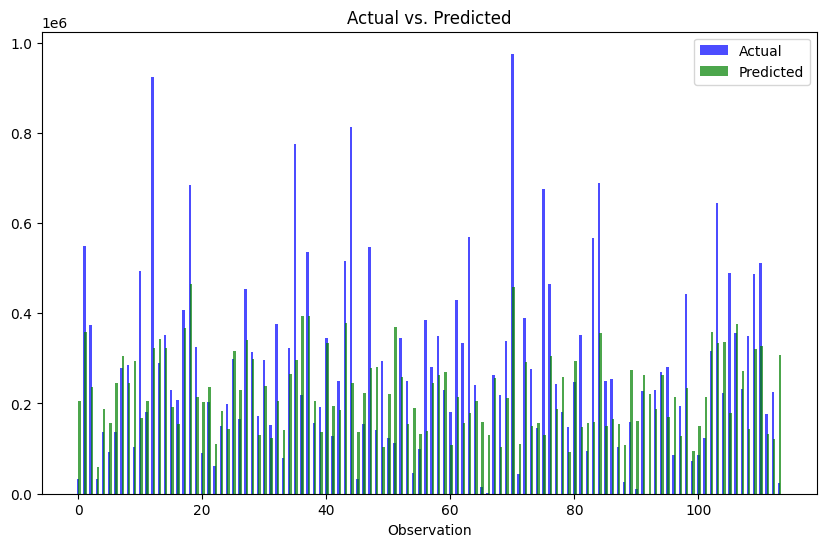

In [24]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'Actual' and 'Predicted' columns
# You can create a bar plot to compare actual and predicted values

plt.figure(figsize=(10, 6))

# Create the x-axis values (observation numbers)
x_values = range(len(df))

# Plot the actual and predicted values as bars
plt.bar(x_values, df['Actual'], width=0.4, label='Actual', align='center', color='blue', alpha=0.7)
plt.bar(x_values, df['Predicted'], width=0.4, label='Predicted', align='edge', color='green', alpha=0.7)

plt.title("Actual vs. Predicted")
plt.xlabel("Observation")

plt.legend()
plt.show()


In [25]:
# save the model 
import joblib
joblib.dump(voting_regressor, 'voting_regressor.joblib')


['voting_regressor.joblib']